[[3.8318987  3.9592574  3.602145   ... 0.         0.         0.        ]
 [2.5269575  2.631672   2.7363863  ... 0.         0.         0.        ]
 [0.92298317 0.7771493  2.2264318  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


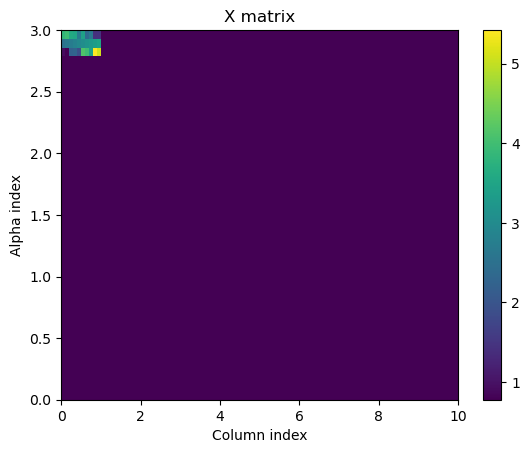

: 

In [1]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

def construct_X(M, alphas, Np=None):
    if Np is None:
        Np = int(np.sqrt(2) * M)

    D = M * M
    No = len(alphas)
    N = Np * No

    h = 1
    a0 = -(M - 1) / 2
    b0 = -(M - 1) / 2
    ja, jb = np.meshgrid(np.arange(M), np.arange(M))
    C = np.stack((a0 + ja * h, b0 + jb * h), axis=0)

    i_indices = []
    j_indices = []
    weights = []

    for alpha_idx, alpha in enumerate(alphas):
        n = np.array([[np.cos(np.deg2rad(alpha))], [np.sin(np.deg2rad(alpha))]])
        p = np.dot(C.transpose((1, 2, 0)), n) + 1

        mask = np.logical_and(p > 0, p < Np)
        indices = np.where(mask)

        if len(indices[0]) > 0:
            i_indices.extend([alpha_idx] * len(indices[0]))
            j_indices.extend(indices[0])
            weights.extend(p[indices] - np.floor(p[indices]))

    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype=np.float32)

    return X

# Example usage
M = 10
alphas = [-33, 1, 42]

X = construct_X(M, alphas)

# Convert sparse matrix to dense numpy array for visualization
X_dense = X.toarray()
print(X_dense)

# Determine the minimum and maximum values in X
X_min = np.min(X_dense[X_dense > 0])
X_max = np.max(X_dense)

# Scale the plot based on the minimum and maximum values in X
plt.imshow(X_dense, cmap='viridis', extent=[0, M, 0, len(alphas)], vmin=X_min, vmax=X_max, aspect='auto')
plt.colorbar()
plt.xlabel('Column index')
plt.ylabel('Alpha index')
plt.title('X matrix')
plt.show()
